### The diffetrence between multivariate and multiple variables

<b> multiple variables </b> refer to number of predictors.
<br/><br>
<b> multivariate  </b> refer to number of outcomes or responses

# Polynomial regression

The following code is to generate random samples for polynomial relationships.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Plot the relationship between the dependent and independent variables.

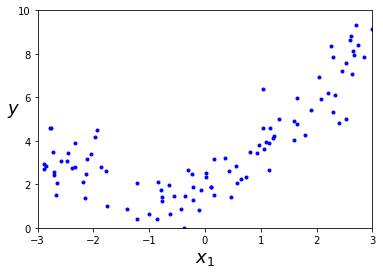

In [2]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Develop a polynomial equation from $X$ points 

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 2)

Apply the linear regrssion on the polynomial function and return the parameters.

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95418984]), array([[0.9014571 , 0.50801791]]))

Plot the fitting model with the curve.

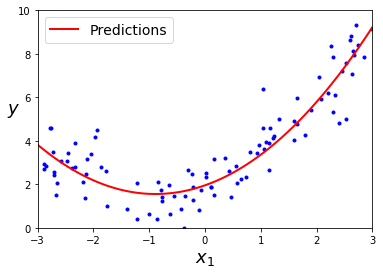

In [5]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning curve for plain linear regression model

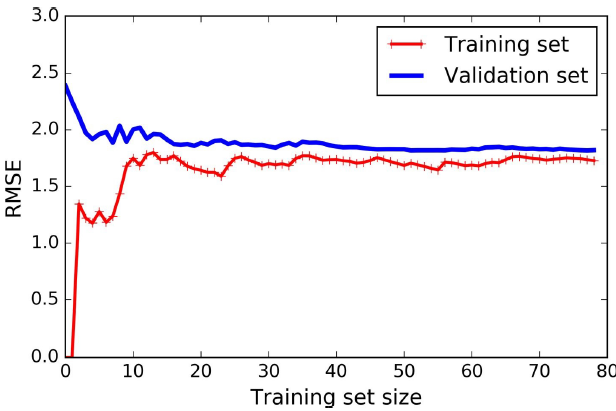



## Learning curve for polynomial regression model

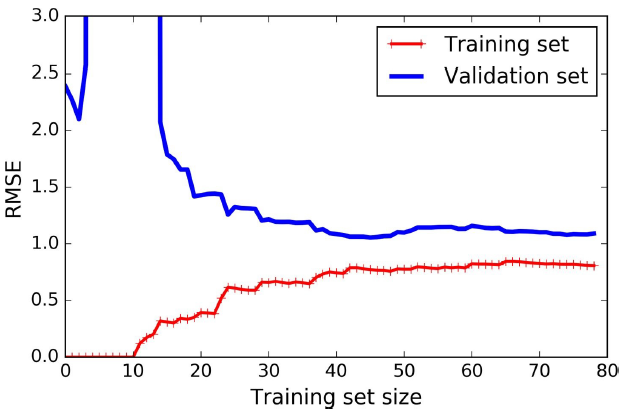

# Regularization

Regularization is the process to reduce the whole complexity algorithm helping it capture the signal in the data without adjusting too much to noise.
<br/>
It constrains/ regularizes or shrinks the coefficient (the fewer degrees of freedom) estimates towards zero. In other words this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.
<br/>
The idea is to add term to the cost function as penalties.

# Ridge Regression

Ridge Regression cost function:  
<center>  $J(\theta)=MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n\theta_{i}^2$ </center>

<br/>
It is important to scale the data (e.g., using a StandardScalor).
<br/>
The L2 regularization will force the parameters to be relatively small.


In [6]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [7]:
#Example with Ridge:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.55071465]])

In [8]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

# Lasso Regression

Lasso Regression cost function:  
<center>  $J(\theta)=MSE(\theta) + \alpha\sum_{i=1}^n|\theta_{i}|$ </center>

<br/>
It is important to scale the data (e.g., using a StandardScalor).
<br/>
The L1 regularization will shrink some parameters to zero.


In [9]:
#Example with Lasso:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49903849])

# ElasticNet Regression

Lasso Regression cost function:  
<center>  $J(\theta)=MSE(\theta) + r\alpha\sum_{i=1}^n|\theta_{i}| + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_{i}^2$ </center>

<br/>
It is important to scale the data (e.g., using a StandardScalor).
<br/>
It is between Lasso and Ridge Regression.

In [11]:
#Example witElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="elasticnet", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49904983])

# Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum.
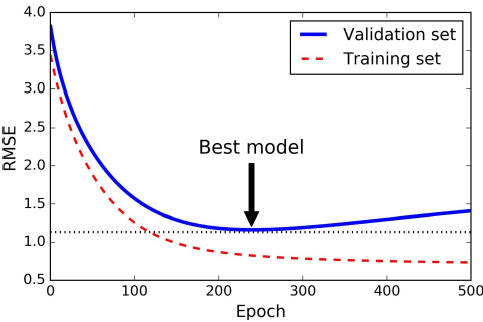

# [Logistic Regression][1]

Consider a model with two predictors $x_{1},x_{2}$ and one binary (Bernoulli) response variable $Y$, which we denote $p=P(Y=1)$. We assume there is a linear relationship between the predcitor variable and the [log-odds][2]: We can model the relationship into the following function-- of note b could be 10 or $e$ but usually $e$ : 
<br/><br/>
<center> $\large\log_{b}\frac{p}{1-p}=b^{(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2})}$ </center> <br/>
<center> $\large p=\frac{1}{1+b^{(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2})}}$ </center>


## odds

<center> $\large odds=\frac{p}{1-p}$ </center> 


## [odds ratio (OR)][5]

[OR][5] is a statistic that quantifies the strength of the association between $A$ and $B$ with two probabilities $p_{1}$ and $p_{2}$: </br>

<center> $OR=\large \frac{\frac{p_{1}}{1-p_{1}}}{\frac{p_{2}}{1-p_{2}}}$ </center> 



if $OR=1$  that indicates the condition or event under study is equally likely to occur in both groups; otherwise, if $OR > 1$  indicates that the condition or event is more likely to occur in the first group; otherwise, if $OR < 1$  indicates that the condition or event is more likely to occur in the second group.


## Sigmoid function (with shape S)

<center> sigmoid$\large(x)= \frac{1}{{1+e^{-x}}}=\frac{e^x}{{e^x+1}} $ </center>


[The Numeric Example][3]



[1]:https://en.wikipedia.org/wiki/Logistic_regression
[2]:https://en.wikipedia.org/wiki/Logit
[3]:http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html
[4]:https://en.wikipedia.org/wiki/Odds_ratio
[5]:http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html



## [Difference between Logistic and Linear Regression][1]

If we take the weighted sum of inputs as the output as we do in Linear Regression, the value can be more than 1 but we want a value between 0 and 1. That’s why Linear Regression can’t be used for classification tasks. We can see from the below <u>(left figure)</u> that the output of the linear regression is passed through an activation function <u>(right figure)</u> that can map any real value between 0 and 1:

<img style="float: left" src="./images/LR-image.png" alt="drawing" height="300" width="400"/>


<img style="float: right" src="./images/sigmoid.png" alt="drawing" height="300" width="400"/>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b> Sigmoid Function </b>



[1]:https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

# [Decision Boundary][1]

In a statistical-classification problem with [two classes][2], a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class.

<img style="float: center" src="./images/Decision Boundary.png" alt="drawing" height="300" width="400


Read the book pp (136-139)


[1]:https://en.wikipedia.org/wiki/Decision_boundary
[2]:https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

# [Multi-nomominal logistic regression][2]

It is the generalization of logistic regression to multiclass problems. It is to construct a score from set of weights that are linearly combined with the explanatory variables (features) of a given observation using a dot product:

<center> $score(X_{i},k)=\beta_{k}X_{i}$ </center>

Where $X_{i}$ is the vector of explanatory variables describing observation $i$. $\beta_{k}$  is a vector of weights (or regression coefficients) corresponding to outcome $k$, and $score(X_{i},k)$ is the score associated with assigning observation $i$ to category $k$. The linear predictor function $f(k,i)$: <br/><br/>

<center> $f(k,i)=\beta_{0,k}+\beta_{1,k}x_{1,i}+\cdots+\beta_{M,k}x_{M,i}$ </center>

where $\beta _{m,k}$ is a regression coefficient associated with the $m$th explanatory variable and the $k$th outcome. So instead of using sigmoid function, we will need to use softmax function:

<center> softmax$\large(k,x_{1},\cdots,x_{n})= \frac{e^x_{k}}{\sum_{i}^{n}{e^x_{i}}} $ </center>




[The difference between sigmoid and softmax functions][1]


[1]:https://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/
[2]:https://en.wikipedia.org/wiki/Multinomial_logistic_regression